In [1]:
%pip install scikit-learn

  Using cached numpy-2.0.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.9 MB 10.5 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/10.9 MB 21.9 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.9 MB 18.2 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.9 MB 20.6 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.9 MB 25.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.2/10.9 MB 25.8 MB/s eta 0:00:01
   -------------------- ------------------- 5.7/10.9 MB 17.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.9/10.9 MB 19.3 MB/s eta 0:00:01
   ------------------------------ --------- 8.3/10.9 MB 19.7 MB/s eta 0:00:01
   ---


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importación de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
%matplotlib inline

In [7]:
# guardo la ubicacion del excel en una variable y luego en un dataframe

ubicacion = f'archivos/S_MVH_AX02.xlsx'
data = pd.read_excel(ubicacion, sheet_name='S_MVH_AX02', header =1)

In [8]:
# traigo las columnas del dataframe
data.columns.values

array(['Año', 'Egresos', 'Día-cama disponible',
       'Promedio día-cama disponible', 'Paciente-día',
       'Promedio paciente-día', 'Promedio de permanencia',
       'Porcentaje ocupacional'], dtype=object)

In [9]:
# importo más librerias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
# Elimino ciertas columnas

data = data.drop(columns=[ 'Paciente-día','Promedio día-cama disponible', 'Promedio paciente-día', 'Porcentaje ocupacional'])

In [11]:
# Traigo columnas para comprobar que se borraron correctamente
data.columns.values

array(['Año', 'Egresos', 'Día-cama disponible', 'Promedio de permanencia'],
      dtype=object)

In [12]:
# Chequeo existencia de nulos

data.isnull().sum()/len(data)*100

Año                         0.000000
Egresos                    17.948718
Día-cama disponible        17.948718
Promedio de permanencia    17.948718
dtype: float64

In [13]:
# Eliminar filas con valores nulos

data = data.dropna()

In [14]:
# Chequeo existencia de nulos

data.isnull().sum()/len(data)*100

Año                        0.0
Egresos                    0.0
Día-cama disponible        0.0
Promedio de permanencia    0.0
dtype: float64

In [15]:
# Chequeo si hay datos duplicados

print(data.duplicated().sum())

0


In [16]:
print(data)

     Año Egresos Día-cama disponible Promedio de permanencia
0   1980  145430             2271073                    12.4
1   1985  145087             2303957                    11.8
2   1990  141708             1891797                    10.3
3   1991  154166             1931474                     9.8
4   1992  150762             1974778                     9.8
5   1993  170447             3287427                    15.2
6   1994  176082             3191158                    14.8
7   1995  185319             3256297                    14.5
8   1996  189852             3307239                    14.5
9   1997  184755             3266872                    14.7
10  1998  181792             3241228               14.757553
11  1999  178963             3102081                    14.5
12  2000  181678             2991932                    13.9
13  2001  181219             2979675                    13.8
14  2002  189184             3002709                    13.3
15  2003  195573        

In [17]:
data = data.drop([30, 31])

In [18]:
print(data)

     Año Egresos Día-cama disponible Promedio de permanencia
0   1980  145430             2271073                    12.4
1   1985  145087             2303957                    11.8
2   1990  141708             1891797                    10.3
3   1991  154166             1931474                     9.8
4   1992  150762             1974778                     9.8
5   1993  170447             3287427                    15.2
6   1994  176082             3191158                    14.8
7   1995  185319             3256297                    14.5
8   1996  189852             3307239                    14.5
9   1997  184755             3266872                    14.7
10  1998  181792             3241228               14.757553
11  1999  178963             3102081                    14.5
12  2000  181678             2991932                    13.9
13  2001  181219             2979675                    13.8
14  2002  189184             3002709                    13.3
15  2003  195573        

In [19]:
# Convertir columnas específicas a numérico
columns_to_convert = ['Año', 'Egresos', 'Día-cama disponible', 'Promedio de permanencia']

# Usando pd.to_numeric para convertir columnas a numérico
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Alternativamente, usar astype para convertir columnas a numérico
# df[columns_to_convert] = df[columns_to_convert].astype(float)  # Si estás seguro que todos son float

# Mostrar el DataFrame convertido
print(data)
print(data.dtypes)  # Verificar los tipos de datos después de la conversión

     Año  Egresos  Día-cama disponible  Promedio de permanencia
0   1980   145430           2271073.00                12.400000
1   1985   145087           2303957.00                11.800000
2   1990   141708           1891797.00                10.300000
3   1991   154166           1931474.00                 9.800000
4   1992   150762           1974778.00                 9.800000
5   1993   170447           3287427.00                15.200000
6   1994   176082           3191158.00                14.800000
7   1995   185319           3256297.00                14.500000
8   1996   189852           3307239.00                14.500000
9   1997   184755           3266872.00                14.700000
10  1998   181792           3241228.00                14.757553
11  1999   178963           3102081.00                14.500000
12  2000   181678           2991932.00                13.900000
13  2001   181219           2979675.00                13.800000
14  2002   189184           3002709.00  

In [20]:
# Ejecuto un describe sobre la tabla

data.describe()

,Año,Egresos,Día-cama disponible,Promedio de permanencia
count,30.000000,30.000000,3.000000e+01,30.000000
mean,2002.100000,175855.366667,2.758001e+06,12.318500
std,9.582131,15384.438527,4.083020e+05,1.702310
min,1980.000000,141708.000000,1.891797e+06,9.800000
25%,1995.250000,168928.250000,2.560502e+06,10.948206
50%,2002.500000,180779.000000,2.725361e+06,11.980000
75%,2009.750000,185278.750000,3.072470e+06,13.875000
max,2017.000000,196975.000000,3.307239e+06,15.200000


In [21]:
# Calculo la correlación de cada variable independiente (x) con la varible dependiente (Y)

correlaciones = data.corr()['Promedio de permanencia']
print(correlaciones)

Año                       -0.365316
Egresos                    0.428718
Día-cama disponible        0.875575
Promedio de permanencia    1.000000
Name: Promedio de permanencia, dtype: float64


In [22]:
# Filtro con las columnas que tienen una correlación entre 0.1 y 1 y -0.1 y -1

feature_selection = correlaciones[abs(correlaciones) > 0.1].index

In [23]:
# Genero un dataframe solo con las variables seleccionadas

data2 = data[feature_selection]

print(data.shape)
print(data2.shape)

(30, 4)
(30, 4)


In [24]:
data2.columns.values

array(['Año', 'Egresos', 'Día-cama disponible', 'Promedio de permanencia'],
      dtype=object)

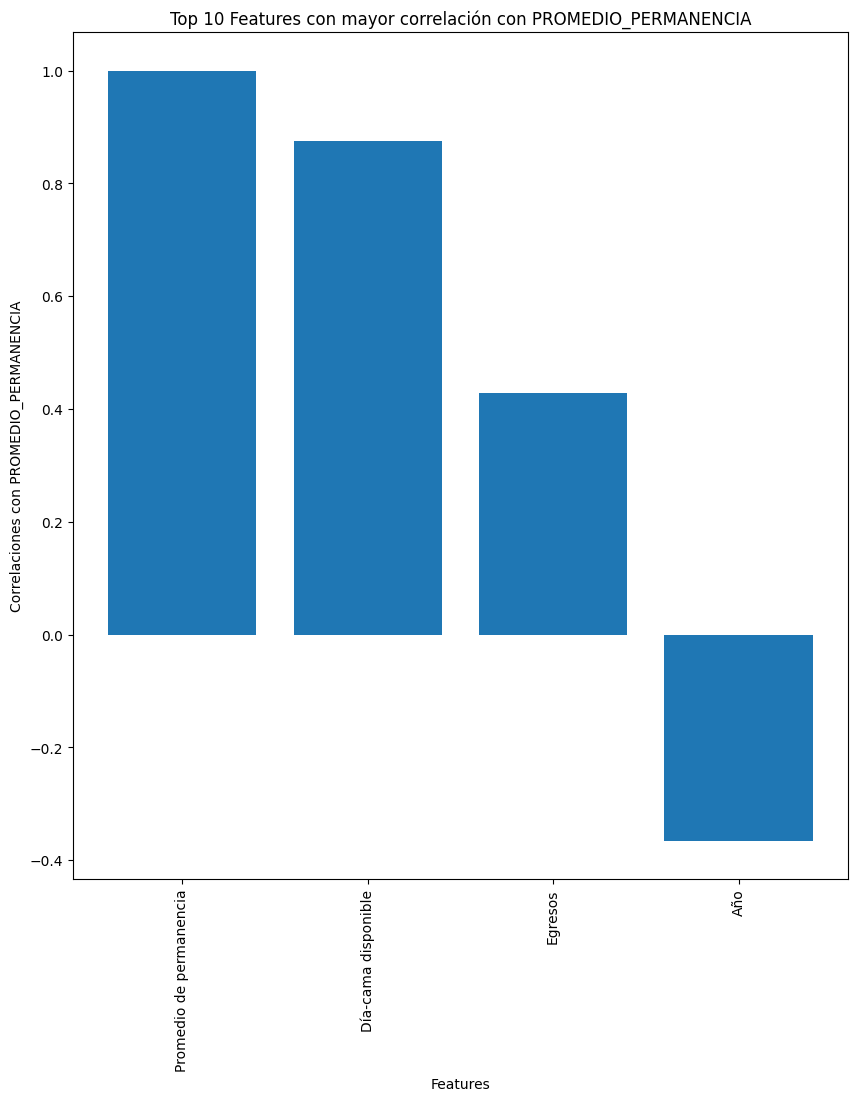

In [25]:
top_10_features = correlaciones.abs().nlargest(10).index
top_10_corr_values = correlaciones[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlaciones con PROMEDIO_PERMANENCIA')
plt.title('Top 10 Features con mayor correlación con PROMEDIO_PERMANENCIA')
plt.xticks(rotation=90)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Para hacerla fácil, armamos una lista con las columnas a normalizar
columns_to_normalize = ['Año', 'Egresos', 'Día-cama disponible', 'Promedio de permanencia']

# Z-score
scaler = StandardScaler() # instanciamos el objeto que escala
data2[columns_to_normalize] = scaler.fit_transform(data2[columns_to_normalize]) # fit_transform: primero se "amolda" (fitea), después aplica la transformacion sobre las columnas a normalizar

data2

,Año,Egresos,Día-cama disponible,Promedio de permanencia
0,-2.345804,-2.011480,-1.212955,0.048694
1,-1.815079,-2.034157,-1.131040,-0.309793
2,-1.284354,-2.257549,-2.157746,-1.206012
3,-1.178209,-1.433926,-2.058909,-1.504752
4,-1.072064,-1.658971,-1.951037,-1.504752
5,-0.965919,-0.357558,1.318820,1.721637
6,-0.859774,0.014983,1.079011,1.482645
7,-0.753629,0.625659,1.241274,1.303401
8,-0.647484,0.925345,1.368173,1.303401
9,-0.541339,0.588372,1.267617,1.422897


In [27]:
# Decision Tree
# Importar las librerías necesarias
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Definir la función para evaluar el modelo
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Generar predicciones con el modelo ya entrenado usando las variables predictoras de test
    y_pred = model.predict(X_test)

    # Calcular métricas comparando mi predicción de y de test contra los valores reales
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Imprimir resultados
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    
    # Devolver modelo y predicciones para poder guardar los objetos
    return model, y_pred

# Selección de variables independientes (X) y la variable objetivo (y)
X = data2[['Año', 'Egresos', 'Día-cama disponible']]
y = data2['Promedio de permanencia']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
dt_model = DecisionTreeRegressor(random_state=42)

# Evaluar el modelo
dt_model, dt_pred = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

Mean Squared Error: 0.052931521703472144
R^2 Score: 0.9376604713972134
